In [ ]:
# Elaborado por:
# Ana Mantilla : anagmd2019@gmail.com
# Paul Goyes : goyes.yesid@gmail.com

In [ ]:
!git clone https://github.com/Anagabrielamantilla/MineralPrediction.git

fatal: destination path 'MineralPrediction' already exists and is not an empty directory.


# **Modelo de redes neuronales fully-connected**

**01. Cargar los datos**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#Importar los datos con pandas

df=pd.read_csv('/content/MineralPrediction/Data/04_Training.csv') 


In [ ]:
df.head(3)

,DEP,PC9,PC8,PC7,PC6,PC5,PC4,PC3,PC2,PC1
0,0,0.00049,-0.19757,-1.27453,1.57498,1.33215,-0.69961,-1.07609,0.28853,0.11251
1,0,-0.00048,0.10828,-0.83615,1.93379,1.45474,-1.68057,-1.19802,-0.30925,0.06977
2,0,-0.00030,-0.18938,-0.00273,1.80774,0.08572,0.98614,0.10899,-0.27055,-0.04004


In [ ]:
#Extraer las variables de entrada y de salida de la tabla de atributos

y_names=['DEP']
y=df[y_names].values

x_names=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9']
X=df[x_names].values

In [ ]:
# importar la libreria para usar tensorflow 

import tensorflow as tf

In [ ]:
#PRIMERO: crear el modelo o red neuronal 


#model.add(tf.keras.layers.BatchNormalization())

model = tf.keras.Sequential()
model.add(tf.keras.Input(shape=(9,))) # CAPA INPUT, TIENE LAS NEURONAS DE IGUAL NUMERO DE LAS VARIABLES DE ENTRADA
model.add(tf.keras.layers.Dense(10, activation="relu")) # 1 CAPA OCULTA, TIENE LAS NEURONAS QUE REQUIERA
model.add(tf.keras.layers.Dropout(0.2)) #DROPOUT
model.add(tf.keras.layers.Dense(10, activation="relu")) # 2 CAPA OCULTA, TIENE LAS NEURONAS QUE REQUIERA
model.add(tf.keras.layers.Dropout(0.2)) #DROPOUT
model.add(tf.keras.layers.Dense(10, activation="relu")) # 3 CAPA OCULTA, TIENE LAS NEURONAS QUE REQUIERA
model.add(tf.keras.layers.Dropout(0.2)) #DROPOUT
model.add(tf.keras.layers.Dense(10, activation="relu")) # 4 CAPA OCULTA, TIENE LAS NEURONAS QUE REQUIERA
model.add(tf.keras.layers.Dropout(0.2)) #DROPOUT
model.add(tf.keras.layers.Dense(10, activation="relu")) # 5 CAPA OCULTA, TIENE LAS NEURONAS QUE REQUIERA
model.add(tf.keras.layers.Dropout(0.2)) #DROPOUT
model.add(tf.keras.layers.Dense(10, activation="relu")) # 6 CAPA OCULTA, TIENE LAS NEURONAS QUE REQUIERA
model.add(tf.keras.layers.Dropout(0.2)) #DROPOUT
model.add(tf.keras.layers.Dense(10, activation="relu")) # 7 CAPA OCULTA, TIENE LAS NEURONAS QUE REQUIERA
model.add(tf.keras.layers.Dropout(0.2)) #DROPOUT
model.add(tf.keras.layers.Dense(10, activation="relu")) # 8 CAPA OCULTA, TIENE LAS NEURONAS QUE REQUIERA)
model.add(tf.keras.layers.Dropout(0.2)) #DROPOUT
model.add(tf.keras.layers.Dense(10, activation="relu")) # 9 CAPA OCULTA, TIENE LAS NEURONAS QUE REQUIERA
model.add(tf.keras.layers.Dropout(0.2)) #DROPOUT
model.add(tf.keras.layers.Dense(10, activation="relu")) # 10 CAPA OCULTA, TIENE LAS NEURONAS QUE REQUIERA

model.add(tf.keras.layers.Dense(1, activation="sigmoid")) # CAPA DE SALIDA, TIENE UNA NEURONA, SE ACTIVA CON FUNCION SIGMODE PARA OBTENER VALORES ENTRE 0 Y 1


In [ ]:
# # imprimir un resumen del modelo
model.summary()

In [ ]:
# imprimir un diagrama de grafo del modelo

#tf.keras.utils.plot_model(model, show_shapes=True)

In [ ]:
# Se indica el optimizador usado para el backpropagation y las metricas de evaluación.

optimizer    = tf.keras.optimizers.Adam(learning_rate=1e-3)
loss_fn  = tf.keras.losses.BinaryCrossentropy() # tambien se puede indicar la función de perdida como las predeterminadas en keras

In [ ]:
model.compile(optimizer=optimizer, loss=loss_fn, metrics=['accuracy'])

In [ ]:
history= model.fit(
    x=X,
    y=y,
    batch_size=147,
    epochs=5000,
    )

Se truncaron las últimas líneas 5000 del resultado de transmisión.
2/2 [==============================] - 0s 7ms/step - loss: 0.2734 - accuracy: 0.8986
Epoch 2502/5000
2/2 [==============================] - 0s 9ms/step - loss: 0.3506 - accuracy: 0.8716
Epoch 2503/5000
2/2 [==============================] - 0s 9ms/step - loss: 0.2387 - accuracy: 0.8919
Epoch 2504/5000
2/2 [==============================] - 0s 10ms/step - loss: 0.3282 - accuracy: 0.8919
Epoch 2505/5000
2/2 [==============================] - 0s 8ms/step - loss: 0.2850 - accuracy: 0.9054
Epoch 2506/5000
2/2 [==============================] - 0s 9ms/step - loss: 0.2850 - accuracy: 0.9122
Epoch 2507/5000
2/2 [==============================] - 0s 9ms/step - loss: 0.3290 - accuracy: 0.8784
Epoch 2508/5000
2/2 [==============================] - 0s 9ms/step - loss: 0.2715 - accuracy: 0.9054
Epoch 2509/5000
2/2 [==============================] - 0s 9ms/step - loss: 0.3067 - accuracy: 0.8784
Epoch 2510/5000
2/2 [==================

Recordar que los pesos se inicializan de manera aleatoria

In [ ]:
# en la variable "history" quedan guardadas todas las métricas y funciones de perdida evaluadas en cada época. 
# entonces podemos hacer una gráfica para cada una de ellas, primero vemos lo que podemos gráficar:


print(history.history.keys())

dict_keys(['loss', 'accuracy'])


In [ ]:
score= model.evaluate(X,y) # el primer valor es el loss, el segundo accuracy

5/5 [==============================] - 0s 3ms/step - loss: 0.1420 - accuracy: 0.9459


In [ ]:
print('Test loss:', score[0]) 
print('Test accuracy:', score[1])

Test loss: 0.14203912019729614
Test accuracy: 0.9459459185600281


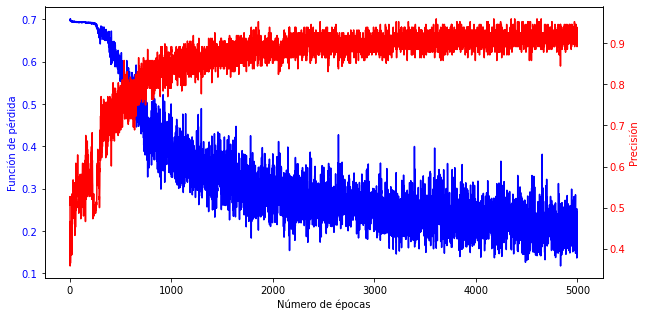

In [ ]:
# en la variable "history" quedan guardadas todas las métricas y funciones de perdida evaluadas en cada época. 
# entonces podemos hacer una gráfica para cada una de ellas, primero vemos lo que podemos gráficar:


# print(history.history.keys())
fig, ax1 = plt.subplots(1,1,figsize=(10,5))
ax1.tick_params(axis='y', labelcolor='blue')
ax1.plot(history.history['loss'],'b',label='LOSS')
ax1.set_ylabel('Función de pérdida', color='blue')
ax1.set_xlabel('Número de épocas', color='black')
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Precisión', color='red')
ax2.plot(history.history['accuracy'],'red')
ax2.tick_params(axis='y', labelcolor='red')

In [ ]:
EX1,EX2,EX3,EX4,EX5,EX6,EX7,EX8,EX9 = np.meshgrid(
    np.linspace(X[:,0].min(),X[:,0].max(),25),
    np.linspace(X[:,1].min(),X[:,1].max(),25),
    np.linspace(X[:,2].min(),X[:,2].max(),2),
    np.linspace(X[:,3].min(),X[:,3].max(),2),
    np.linspace(X[:,4].min(),X[:,4].max(),2),
    np.linspace(X[:,5].min(),X[:,5].max(),2),
    np.linspace(X[:,6].min(),X[:,6].max(),2),
    np.linspace(X[:,7].min(),X[:,7].max(),2),
    np.linspace(X[:,8].min(),X[:,8].max(),2)
    )

X_testgrid = np.stack([EX1.ravel(),EX2.ravel(),EX3.ravel(),EX4.ravel(),
                       EX5.ravel(),EX6.ravel(),EX7.ravel(),EX8.ravel(),EX9.ravel()],axis=1)

In [ ]:
#hacemos la prediccion en esa grilla

y_testgrid = model.predict(X_testgrid)

2500/2500 [==============================] - 4s 2ms/step


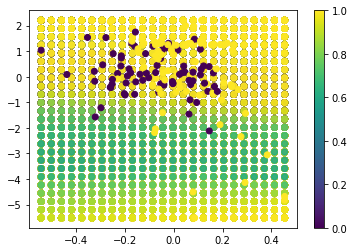

In [ ]:
plt.scatter(EX1.ravel(),EX2.ravel(),c=y_testgrid,alpha=0.5)

plt.scatter(X[:,0],X[:,1],c=y)
plt.colorbar()


**02. Evaluación de métricas**

In [ ]:
val = pd.read_excel('/content/MineralPrediction/Data/Validacion.xlsx')

In [ ]:
# # Validación del modelo con los datos de testeo
x_names_val = ['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9']
x_val = val[x_names_val]

y_name_val = ['DEP']
y_val = val[y_name_val]

In [ ]:
# Predecir los datos

pred_val = model.predict(x_val)

1/1 [==============================] - 0s 91ms/step


In [ ]:
pred_val.ravel()

In [ ]:
# Comparar 
y_val.values.ravel()

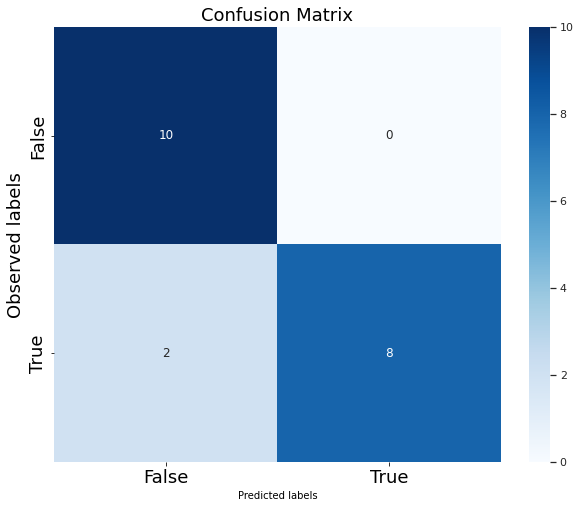

In [ ]:
# # Matriz de confusión

from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

matriz3 = confusion_matrix(y_val, np.around(pred_val))
plot_confusion_matrix(conf_mat = matriz3, figsize = (10,8))

ax = plt.subplot()
sns.set(font_scale=1) # Adjust to fit
sns.heatmap(matriz3, annot=True, ax=ax, cmap="Blues", fmt="g");  

# Labels, title and ticks
label_font = {'size':'18'}  # Adjust to fit
ax.set_xlabel('Predicted labels');
ax.set_ylabel('Observed labels',fontdict=label_font);

title_font = {'size':'18'}  # Adjust to fit
ax.set_title('Confusion Matrix', fontdict=title_font);

ax.tick_params(axis='both', which='major', labelsize=18)  # Adjust to fit
ax.xaxis.set_ticklabels(['False', 'True']);
ax.yaxis.set_ticklabels(['False', 'True']);

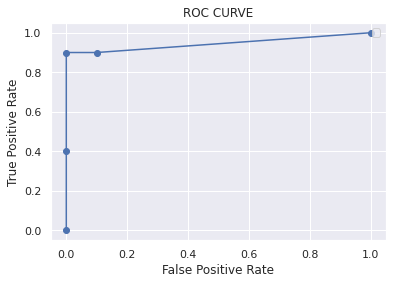

In [ ]:
# # Cálculo del AUC y ROC

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc

fpr_, tpr_, thresholds_ = roc_curve(y_val, pred_val)

plt.plot(fpr_, tpr_, marker='o')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.title('ROC CURVE')
plt.grid(True)

In [ ]:
# # Cálculo del AUC

from sklearn import metrics

print(f'El AUC para el modelo de bosques aleatorios es de: {metrics.auc(fpr_, tpr_)}')

El AUC para el modelo de bosques aleatorios es de: 0.945


### **03. Predicción**

In [ ]:
#primero lo primero, cargar el raster

import gdal

raster  = gdal.Open('/content/drive/MyDrive/TESIS/VIRTUAL-RASTER/04_Virtual_Raster.tif') # Esta ruta cambia según dónde se guardó el archivo del virtual ráster
print(raster)

<osgeo.gdal.Dataset; proxy of <Swig Object of type 'GDALDatasetShadow *' at 0x7f6de454b060> >


In [ ]:
# verificar propiedades del raster

driver = raster.GetDriver()
col   = raster.RasterXSize
rows  = raster.RasterYSize
nelem = col*rows 

print('numero de filas: ', rows)
print('numero de columnas: ', col)

numero de filas:  1261
numero de columnas:  1333


In [ ]:
# Este raster tiene 11 bandas, las cuales se encuentran en orden tal que :


# PRIMERO guardamos el valor de Nondata value que trae el raster para encontrar 
# más adelante la posiciones

# solo se hace una vez para cualquier banda, ya que las posiciones de Nonvalue deben ser las mismas para todas las bandas


Nonvalue = raster.GetRasterBand(1).GetNoDataValue()

In [ ]:
# # ahora extraemos la matriz de valores como un numpy array para cada banda

v1val = raster.GetRasterBand(1).ReadAsArray().flatten()
v2val = raster.GetRasterBand(2).ReadAsArray().flatten()
v3val = raster.GetRasterBand(3).ReadAsArray().flatten()
v4val = raster.GetRasterBand(4).ReadAsArray().flatten()
v5val = raster.GetRasterBand(5).ReadAsArray().flatten()
v6val = raster.GetRasterBand(6).ReadAsArray().flatten()
v7val = raster.GetRasterBand(7).ReadAsArray().flatten()
v8val = raster.GetRasterBand(8).ReadAsArray().flatten()
v9val = raster.GetRasterBand(9).ReadAsArray().flatten()


# ahora los valores se agrupan tal que se forme una matriz de N X 11
# donde N es el número de muestras

DATA = np.stack((v1val,v2val,v3val,v4val,v5val,v6val,v7val,v8val,v9val),axis=1)


# se organizan los datos y se elimnan las posiciones de NonData
NanValues = np.where(v1val == Nonvalue)[0]
cP        = np.arange(0,nelem)
cPP       = np.delete(cP, NanValues, axis=0)

XX = np.delete(DATA, NanValues, axis=0)

In [ ]:
# ahora bien, ya podemos predecir los valores en los pixeles de los raster desde nuestro modelo entrenado

y_raster = model.predict(XX)

52448/52448 [==============================] - 89s 2ms/step


In [ ]:
y_raster

array([[0.08595894],
       [0.08595894],
       [0.08595894],
       ...,
       [1.        ],
       [1.        ],
       [1.        ]], dtype=float32)

In [ ]:
# # Ahora debemos crear nuevamente el formato de datos para llevarlo al raster. 
# # usaremos una variable nueva llena de zeros.En la cual insertaremos los NonValues y los valores de la predicción.
# # el tamaño de esta variable será el mismo que el raster

Rasterdataarray = np.zeros((rows,col)).flatten()

# cPP contiene las posiciones donde van las predicciones
for i in range(cPP.shape[0]):
    Rasterdataarray[cPP[i]]=y_raster[i]
    
# NanValues contiene las posiciones donde van los NOnValues    
for i in range(NanValues.shape[0]):
    Rasterdataarray[NanValues[i]]=Nonvalue


# guardar la predicción en un raster con las mismas caracteristicas del raster input

Rasterout = driver.Create('/content/drive/MyDrive/TESIS/MAPAS-PROBABILIDAD/'+'04_Redes_Neuronales.tif', col, rows, 1, gdal.GDT_Float32)
# Write metadata
Rasterout.SetGeoTransform(raster.GetGeoTransform())
Rasterout.SetProjection(raster.GetProjection())

Rasterout.GetRasterBand(1).WriteArray(Rasterdataarray.reshape(rows,col))
Rasterout.GetRasterBand(1).SetNoDataValue(Nonvalue)
Rasterout = None
del Rasterout

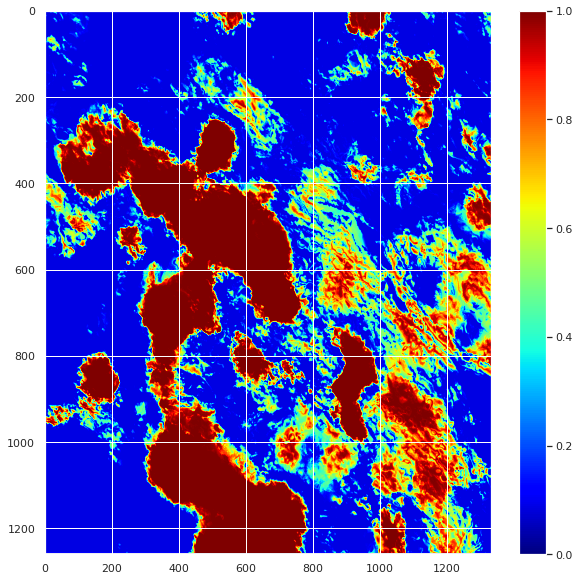

In [ ]:
# # para verificar podemos graficar nuevamente el array
# # hacemos una variable temp2 para evitar cualquier daño en el resto de variables

temp1 = Rasterdataarray.copy()
temp1[temp1==Nonvalue] = None

plt.figure(figsize=(10,10))
plt.imshow(   temp1.reshape((rows,col)), aspect='auto',cmap='jet', vmin=0, vmax=1)

plt.colorbar()